<a href="https://colab.research.google.com/github/nidam2305/nidam/blob/main/CNN/digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
# contienene los datos sobre las imagenes

In [ ]:
digits.keys()
## nos muestra lo que contienene el dataset medoamte un diccionario

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
print(digits.DESCR)
## nos da la i nformacion completa del archivo con todas las caracteristicas

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [ ]:
index = 0
## indice donde puedes escoger el numero que quieras

In [ ]:
image = digits.images[index] ## nos deja ver el numero
label = digits.target[index] ## confirma si es el nuemro que elegiste o no

In [ ]:
print(image)
## dependiendo el numero es un grado de color por ejemeplo el 0 es el blando entre mas alto el numero mas oscuro el color

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


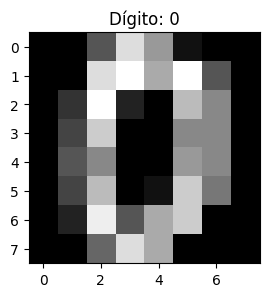

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray)
plt.title(f'Dígito: {label}')
plt.show()
## nos mostrara la imagen es decir la matriz de arriba en este caso en un tamaño de 3 x 3

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.2, random_state=42
)

# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
## hace la division entre los datos de prueba y los de entrenamiento
## acomoda los numeros de 0 a 9 dependioendo la posicion usa 1 o 0

In [ ]:
print(X_train.shape)
print(X_test.shape)
## nos muestra que cantidad de los datos quedo para prueba y entrenamiento


(1437, 64)
(360, 64)


In [ ]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
print(reshaped_tensor)
## los organiza en una matriz de 8 filas y 8 columnas


tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
## pone a todos los datos en el mismo rango osea 0 y 1

In [ ]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
# Redondeamos para tener una mejor visualizacion
reshaped_tensor =  tf.floor(reshaped_tensor * 100) / 100
print(reshaped_tensor)
##  ahora cambio los valores con decimales  a negativos(blanco)
## positivos(negro)

tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [ ]:
# Redimensionar el tensor a la forma (total, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))
## va a forma las capas  de la red neuronal

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3),
        activation='relu',
        input_shape=(8, 8, 1)
    ),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
## le dice el tamaño de la imagen sus caracteristicas
## nos muestra las capas ocultas y de salida

In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)
## esta parte va a modificar los parametros y aprender  los errores
## lo optimiza adam para que sea mas precisa

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
## va a tratar de minimizar si es que hay un error y dice si es bueno o no

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)
## nos dira cuantas veces va a evaluar el modelo cuantas muestras va a procesar

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4355 - loss: 1.9535 - val_accuracy: 0.8889 - val_loss: 0.8624
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9203 - loss: 0.6455 - val_accuracy: 0.9167 - val_loss: 0.3503
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9435 - loss: 0.2629 - val_accuracy: 0.9375 - val_loss: 0.2345
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9702 - loss: 0.1634 - val_accuracy: 0.9549 - val_loss: 0.1893
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9824 - loss: 0.0981 - val_accuracy: 0.9479 - val_loss: 0.1565
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9832 - loss: 0.0919 - val_accuracy: 0.9722 - val_loss: 0.1184
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9957 - loss: 0.0517 - val_accuracy: 0.9618 - val_loss: 0.1271
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9962 - loss: 0.0456 - val_accuracy: 0.9757 - val_l

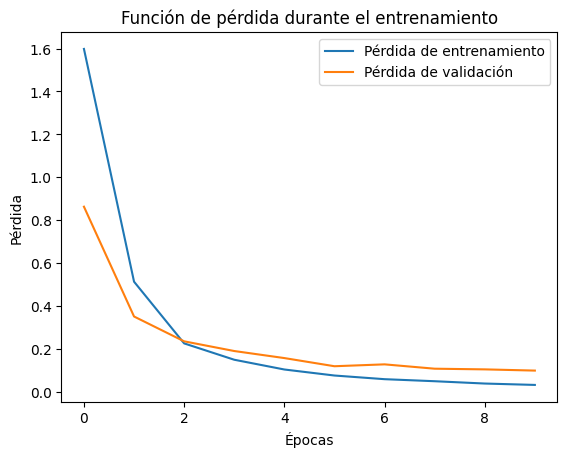

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()
## aqui nos podemos dar cuenta si el modelo esta aprendiendo o no a traves de la grafica

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
## miden que tan bueno o malo fue el rendiemiento

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9734 - loss: 0.0748
Loss: 0.07137887924909592, Accuracy: 0.9750000238418579


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert y_test back to multiclass format
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)
## esta parte del codigo nos da la prediccion de los conjuntos de prueba doncde nos prepara para la matriz de confusion

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


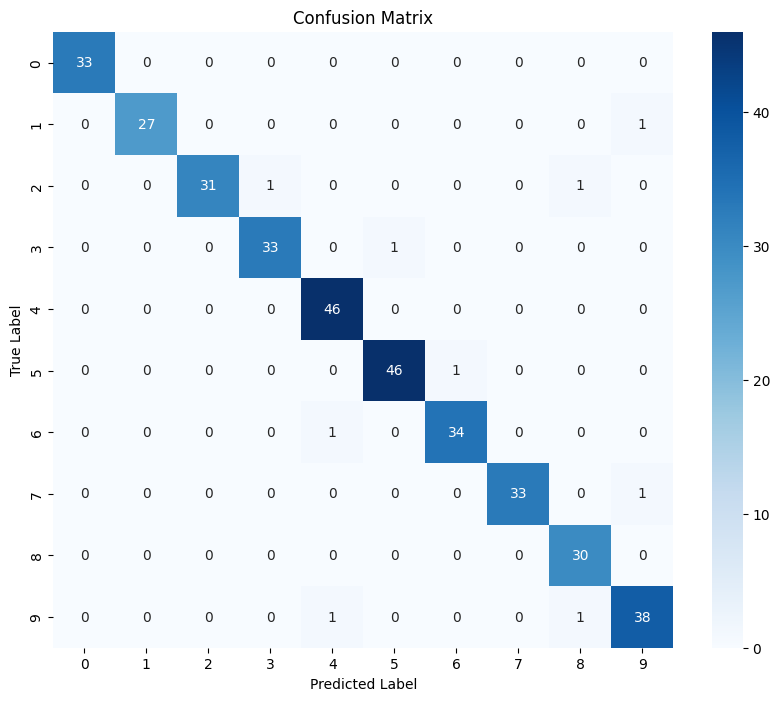

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 0.9642857142857143
Class 2: 0.9393939393939394
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9787234042553191
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 1.0
Class 9: 0.95


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')
    ##  nos muestra visualmente si el codigo si esta aprendiendo

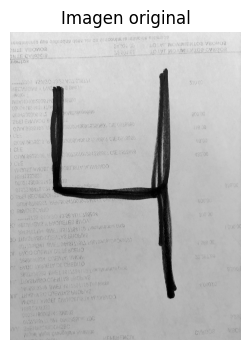

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Cambia por el nombre de tu archivo
ruta = "/content/mi_numero.png"
# Escala de grises ("L")
img = Image.open(ruta).convert("L")

# mostrar la imagen
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title("Imagen original")
plt.axis("off")
plt.show()
## aqui nos permite subir la imagen necesaria para lograr que el codigo si haga una prediccion subviendo una imagen o en este caso una foto con un  numero escrito a mano

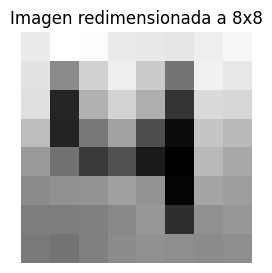

In [ ]:
import matplotlib.pyplot as plt

# redimensionar a 8x8
img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

# mostrar imagen
plt.figure(figsize=(3, 3))
plt.imshow(img_resized, cmap="gray")
plt.title("Imagen redimensionada a 8x8")
plt.axis("off")
plt.show()

# opcional, guardamos la imagen si es necesario
img_resized.save("imagen_8x8.png")
## la imagen que subimos queda ahora como una imagen pixeleada en donde las partes blancas son los numeros bajos y las partes negras somn los numeros altos


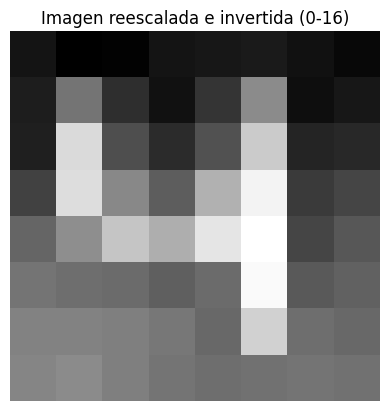

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# reescalar de 0-255 a 0-16 e invertir (fondo negro = 0)
img_array = np.array(img_resized).astype("float32")
img_array = 16 - (img_array / 255 * 16)

# mostrar imagen
plt.imshow(img_array, cmap="gray")
plt.title("Imagen reescalada e invertida (0-16)")
plt.axis("off")
plt.show()
## nos cambia los colores para que el color negro ahora sea negro y donde entra al modelo de la prediccion


In [ ]:
from sklearn.preprocessing import StandardScaler

# normalizar
scaler = StandardScaler()
img_flat = img_array
img_scaled = scaler.fit_transform(img_flat)

# Dar forma (1,8,8) que es el input del modelo
img_tensor = img_scaled.reshape(1, 8, 8)
## estandariza los valores del pixel entre 0 y 1 para que el rendiemiento sea mejor

In [ ]:
pred = model.predict(img_tensor)
digit = np.argmax(pred)
print("Predicción:", digit)
## nos dice que numero ve y si fue una buena prediccion segun sus calculos

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicción: 4
